# Incidence de la varicelle

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek

Les données de l'incidence du syndrome grippal sont disponibles du site Web du [Réseau Sentinelles](http://www.sentiweb.fr/). Nous les récupérons sous forme d'un fichier en format CSV dont chaque ligne correspond à une semaine de la période demandée. Nous téléchargeons toujours le jeu de données complet, qui commence en 1984 et se termine avec une semaine récente.

In [3]:
filename = 'incidence-PAY-7.csv'

Voici l'explication des colonnes données [sur le site d'origine](https://ns.sentiweb.fr/incidence/csv-schema-v1.json):

| Nom de colonne | Libellé de colonne                                                                                                                |
|----------------|-----------------------------------------------------------------------------------------------------------------------------------|
| week           | Semaine calendaire (ISO 8601)                                                                                                     |
| indicator      | Code de l'indicateur de surveillance                                                                                              |
| inc            | Estimation de l'incidence de consultations en nombre de cas                                                                       |
| inc_low        | Estimation de la borne inférieure de l'IC95% du nombre de cas de consultation                                                     |
| inc_up         | Estimation de la borne supérieure de l'IC95% du nombre de cas de consultation                                                     |
| inc100         | Estimation du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants)                                   |
| inc100_low     | Estimation de la borne inférieure de l'IC95% du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants) |
| inc100_up      | Estimation de la borne supérieure de l'IC95% du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants) |
| geo_insee      | Code de la zone géographique concernée (Code INSEE) http://www.insee.fr/fr/methodes/nomenclatures/cog/                            |
| geo_name       | Libellé de la zone géographique (ce libellé peut être modifié sans préavis)                                                       |

La première ligne du fichier CSV est un commentaire, que nous ignorons en précisant `skiprows=1`.

In [4]:
# Si le fichier de données n'est pas présent, il sera téléchargé depuis le serveur.
try:
    raw_data = pd.read_csv(filename, skiprows=1)
except FileNotFoundError:
    !wget "http://www.sentiweb.fr/datasets/incidence-PAY-7.csv"
    raw_data = pd.read_csv(filename, skiprows=1)
raw_data

--2021-03-12 16:11:31--  http://www.sentiweb.fr/datasets/incidence-PAY-7.csv
Resolving www.sentiweb.fr (www.sentiweb.fr)... 134.157.220.17
Connecting to www.sentiweb.fr (www.sentiweb.fr)|134.157.220.17|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘incidence-PAY-7.csv’

incidence-PAY-7.csv     [ <=>                ]  68.03K  --.-KB/s    in 0.003s  

2021-03-12 16:11:32 (20.7 MB/s) - ‘incidence-PAY-7.csv’ saved [69660]



week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202109          7  11766     8111   15421      18          12   
1     202108          7  11382     8422   14342      17          13   
2     202107          7  13561    10315   16807      21          16   
3     202106          7  13401     9810   16992      20          15   
4     202105          7  12210     8988   15432      18          13   
5     202104          7  12026     8826   15226      18          13   
6     202103          7   8913     6375   11451      13           9   
7     202102          7   7795     5430   10160      12           8   
8     202101          7  10525     7750   13300      16          12   
9     202053          7  11978     8406   15550      18          13   
10    202052          7  12012     8285   15739      18          12   
11    202051          7  10564     7574   13554      16          11   
12    202050          7   7063     4744    9382      11           7   
13    202049          7   5026     3145    6907       8           5   
14    202048          7   6683     4312    9054      10           6   
15    202047          7   4999     2963    7035       8           5   
16    202046          7   3752     1963    5541       6           3   
17    202045          7   3696     2016    5376       6           3   
18    202044          7   4391     2375    6407       7           4   
19    202043          7   4376     2505    6247       7           4   
20    202042          7   4000     1979    6021       6           3   
21    202041          7   3961     2099    5823       6           3   
22    202040          7   2078      675    3481       3           1   
23    202039          7   1049      237    1861       2           1   
24    202038          7   2251      781    3721       3           1   
25    202037          7   1584      405    2763       2           0   
26    202036          7    919      100    1738       1           0   
27    202035          7    828        0    1694       1           0   
28    202034          7   2272      371    4173       3           0   
29    202033          7   1284      177    2391       2           0   
...      ...        ...    ...      ...     ...     ...         ...   
1549  199126          7  17608    11304   23912      31          20   
1550  199125          7  16169    10700   21638      28          18   
1551  199124          7  16171    10071   22271      28          17   
1552  199123          7  11947     7671   16223      21          13   
1553  199122          7  15452     9953   20951      27          17   
1554  199121          7  14903     8975   20831      26          16   
1555  199120          7  19053    12742   25364      34          23   
1556  199119          7  16739    11246   22232      29          19   
1557  199118          7  21385    13882   28888      38          25   
1558  199117          7  13462     8877   18047      24          16   
1559  199116          7  14857    10068   19646      26          18   
1560  199115          7  13975     9781   18169      25          18   
1561  199114          7  12265     7684   16846      22          14   
1562  199113          7   9567     6041   13093      17          11   
1563  199112          7  10864     7331   14397      19          13   
1564  199111          7  15574    11184   19964      27          19   
1565  199110          7  16643    11372   21914      29          20   
1566  199109          7  13741     8780   18702      24          15   
1567  199108          7  13289     8813   17765      23          15   
1568  199107          7  12337     8077   16597      22          15   
1569  199106          7  10877     7013   14741      19          12   
1570  199105          7  10442     6544   14340      18          11   
1571  199104          7   7913     4563   11263      14           8   
1572  199103          7  15387    10484   20290      27          18   
1573  199102          7  16277  

Y a-t-il des points manquants dans ce jeux de données ? Non, pas cette fois.

In [5]:
raw_data[raw_data.isnull().any(axis=1)]

Empty DataFrame
Columns: [week, indicator, inc, inc_low, inc_up, inc100, inc100_low, inc100_up, geo_insee, geo_name]
Index: []

In [7]:
data = raw_data.dropna().copy()
data

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202109          7  11766     8111   15421      18          12   
1     202108          7  11382     8422   14342      17          13   
2     202107          7  13561    10315   16807      21          16   
3     202106          7  13401     9810   16992      20          15   
4     202105          7  12210     8988   15432      18          13   
5     202104          7  12026     8826   15226      18          13   
6     202103          7   8913     6375   11451      13           9   
7     202102          7   7795     5430   10160      12           8   
8     202101          7  10525     7750   13300      16          12   
9     202053          7  11978     8406   15550      18          13   
10    202052          7  12012     8285   15739      18          12   
11    202051          7  10564     7574   13554      16          11   
12    202050          7   7063     4744    9382      11           7   
13    202049          7   5026     3145    6907       8           5   
14    202048          7   6683     4312    9054      10           6   
15    202047          7   4999     2963    7035       8           5   
16    202046          7   3752     1963    5541       6           3   
17    202045          7   3696     2016    5376       6           3   
18    202044          7   4391     2375    6407       7           4   
19    202043          7   4376     2505    6247       7           4   
20    202042          7   4000     1979    6021       6           3   
21    202041          7   3961     2099    5823       6           3   
22    202040          7   2078      675    3481       3           1   
23    202039          7   1049      237    1861       2           1   
24    202038          7   2251      781    3721       3           1   
25    202037          7   1584      405    2763       2           0   
26    202036          7    919      100    1738       1           0   
27    202035          7    828        0    1694       1           0   
28    202034          7   2272      371    4173       3           0   
29    202033          7   1284      177    2391       2           0   
...      ...        ...    ...      ...     ...     ...         ...   
1549  199126          7  17608    11304   23912      31          20   
1550  199125          7  16169    10700   21638      28          18   
1551  199124          7  16171    10071   22271      28          17   
1552  199123          7  11947     7671   16223      21          13   
1553  199122          7  15452     9953   20951      27          17   
1554  199121          7  14903     8975   20831      26          16   
1555  199120          7  19053    12742   25364      34          23   
1556  199119          7  16739    11246   22232      29          19   
1557  199118          7  21385    13882   28888      38          25   
1558  199117          7  13462     8877   18047      24          16   
1559  199116          7  14857    10068   19646      26          18   
1560  199115          7  13975     9781   18169      25          18   
1561  199114          7  12265     7684   16846      22          14   
1562  199113          7   9567     6041   13093      17          11   
1563  199112          7  10864     7331   14397      19          13   
1564  199111          7  15574    11184   19964      27          19   
1565  199110          7  16643    11372   21914      29          20   
1566  199109          7  13741     8780   18702      24          15   
1567  199108          7  13289     8813   17765      23          15   
1568  199107          7  12337     8077   16597      22          15   
1569  199106          7  10877     7013   14741      19          12   
1570  199105          7  10442     6544   14340      18          11   
1571  199104          7   7913     4563   11263      14           8   
1572  199103          7  15387    10484   20290      27          18   
1573  199102          7  16277  

Nos données utilisent une convention inhabituelle: le numéro de
semaine est collé à l'année, donnant l'impression qu'il s'agit
de nombre entier. C'est comme ça que Pandas les interprète.
  
Un deuxième problème est que Pandas ne comprend pas les numéros de
semaine.  Il faut lui fournir les dates de début et de fin de
semaine. Nous utilisons pour cela la bibliothèque `isoweek`.

Comme la conversion des semaines est devenu assez complexe, nous
écrivons une petite fonction Python pour cela. Ensuite, nous
l'appliquons à tous les points de nos donnés. Les résultats vont
dans une nouvelle colonne 'period'.

In [38]:
def convert_week(year_and_week_int):
    year_and_week_str = str(year_and_week_int)
    year = int(year_and_week_str[:4])
    week = int(year_and_week_str[4:])
    w = isoweek.Week(year, week)
    return pd.Period(w.day(0), 'W')

data['period'] = [convert_week(yw) for yw in data['week']]

Il restent deux petites modifications à faire.

Premièrement, nous définissons les périodes d'observation
comme nouvel index de notre jeux de données. Ceci en fait
une suite chronologique, ce qui sera pratique par la suite.

Deuxièmement, nous trions les points par période, dans
le sens chronologique.

In [10]:
sorted_data = data.set_index('period').sort_index()

Nous vérifions la cohérence des données. Entre la fin d'une période et
le début de la période qui suit, la différence temporelle doit être
zéro, ou au moins très faible. Nous laissons une "marge d'erreur"
d'une seconde.

Ceci s'avère tout à fait juste sauf pour deux périodes consécutives
entre lesquelles il manque une semaine.

Nous reconnaissons ces dates: c'est la semaine sans observations
que nous avions supprimées !

In [11]:
periods = sorted_data.index
for p1, p2 in zip(periods[:-1], periods[1:]):
    delta = p2.to_timestamp() - p1.end_time
    if delta > pd.Timedelta('1s'):
        print(p1, p2)

Un premier regard sur les données !

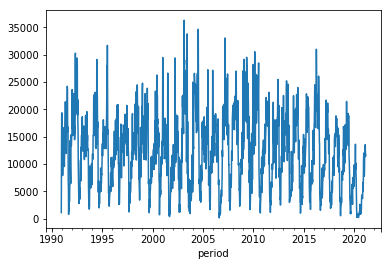

In [12]:
sorted_data['inc'].plot()

Un zoom sur les dernières années montre mieux la situation des pics en hiver. Le creux des incidences se trouve **à la fin de l'été**.
Note: bien que les incidences soient périodiques, le creux de la vague est un peu moins évident que pour la grippe.

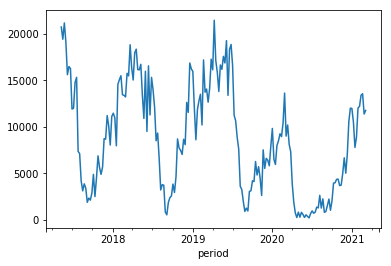

In [13]:
sorted_data['inc'][-200:].plot()

## Etude de l'incidence annuelle

Etant donné que le pic de l'épidémie se situe en hiver, à cheval
entre deux années civiles, nous définissons la période de référence
entre deux minima de l'incidence, du 1er septembre de l'année $N$ au
1er septembre de l'année $N+1$.

Notre tâche est un peu compliquée par le fait que l'année ne comporte
pas un nombre entier de semaines. Nous modifions donc un peu nos périodes
de référence: à la place du 1er septembre de chaque année, nous utilisons le
premier jour de la semaine qui contient le 1er septembre.

Comme l'incidence de syndrome grippal est très faible en été, cette
modification ne risque pas de fausser nos conclusions.

Encore un petit détail: les données commencent an octobre 1990, ce qui
rend la première année incomplète. Nous commençons donc l'analyse en **1991**.

In [30]:
first_sept_week = [pd.Period(pd.Timestamp(y, 9, 1), 'W')
                     for y in range(1991,
                                    sorted_data.index[-1].year)]

En partant de cette liste des semaines qui contiennent un 1er septembre, nous obtenons nos intervalles d'environ un an comme les périodes entre deux semaines adjacentes dans cette liste. Nous calculons les sommes des incidences hebdomadaires pour toutes ces périodes.

Nous vérifions également que ces périodes contiennent entre 51 et 52 semaines, pour nous protéger contre des éventuelles erreurs dans notre code.

In [33]:
year = []
yearly_incidence = []
for week1, week2 in zip(first_sept_week[:-1],
                        first_sept_week[1:]):
    one_year = sorted_data['inc'][week1:week2-1]
    assert abs(len(one_year)-52) < 2
    yearly_incidence.append(one_year.sum())
    year.append(week2.year)
yearly_incidence = pd.Series(data=yearly_incidence, index=year)

Voici les incidences annuelles.

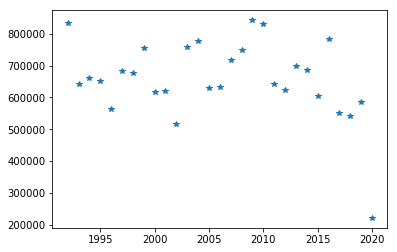

In [34]:
yearly_incidence.plot(style='*')

**L'année 2020 paraît anormalement faible. En réalité, les données sont incomplètes car elles sont censées aller de septembre 2020 à septembre 2021. Nous ignorons donc cette année.**

Une liste triée permet de plus facilement répérer les valeurs les plus élevées (à la fin).

In [35]:
yearly_incidence.sort_values()

2020    221186
2002    516689
2018    542312
2017    551041
1996    564901
2019    584066
2015    604382
2000    617597
2001    619041
2012    624573
2005    628464
2006    632833
2011    642368
1993    643387
1995    652478
1994    661409
1998    677775
1997    683434
2014    685769
2013    698332
2007    717352
2008    749478
1999    756456
2003    758363
2004    777388
2016    782114
2010    829911
1992    832939
2009    842373
dtype: int64

Histogramme des épidémies fortes:

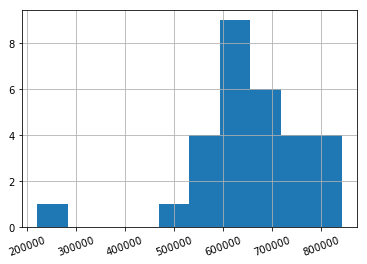

In [36]:
yearly_incidence.hist(xrot=20)